In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv(r"C:\Users\devi\Desktop\travel\TravelInsurancePrediction.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [7]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [8]:
newdf = df.drop("Unnamed: 0", axis=1)

In [9]:
newdf.info

<bound method DataFrame.info of       Age               Employment Type GraduateOrNot  AnnualIncome  \
0      31             Government Sector           Yes        400000   
1      31  Private Sector/Self Employed           Yes       1250000   
2      34  Private Sector/Self Employed           Yes        500000   
3      28  Private Sector/Self Employed           Yes        700000   
4      28  Private Sector/Self Employed           Yes        700000   
...   ...                           ...           ...           ...   
1982   33  Private Sector/Self Employed           Yes       1500000   
1983   28  Private Sector/Self Employed           Yes       1750000   
1984   28  Private Sector/Self Employed           Yes       1150000   
1985   34  Private Sector/Self Employed           Yes       1000000   
1986   34  Private Sector/Self Employed           Yes        500000   

      FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0                 6                1     

In [10]:
newdf.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [11]:
newdf.duplicated().sum()

738

In [12]:
newdf.drop_duplicates(inplace= True)

In [13]:
newdf.duplicated().sum()

0

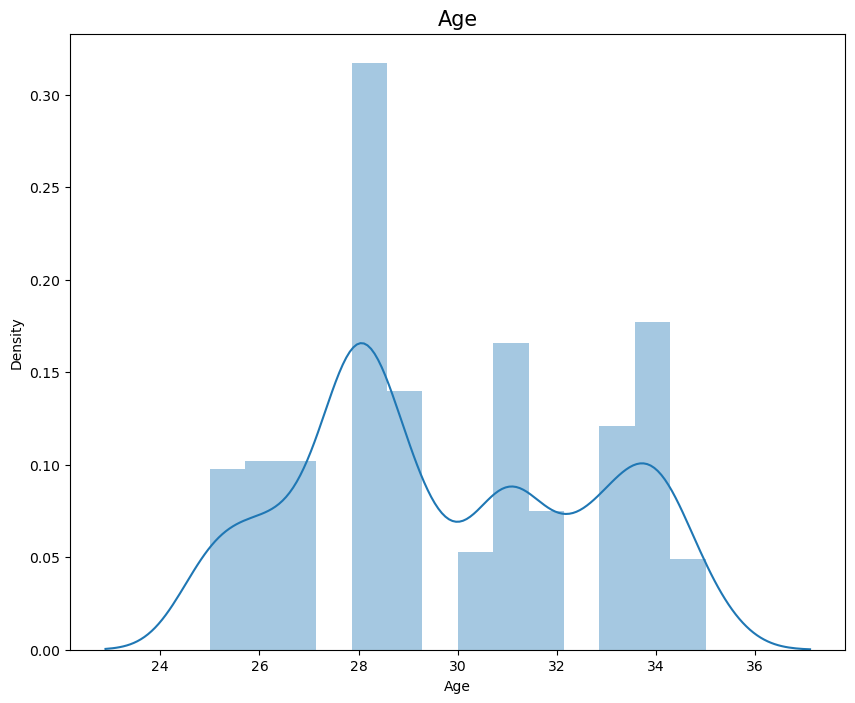

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(newdf["Age"])
plt.title("Age", size= 15)
plt.show()

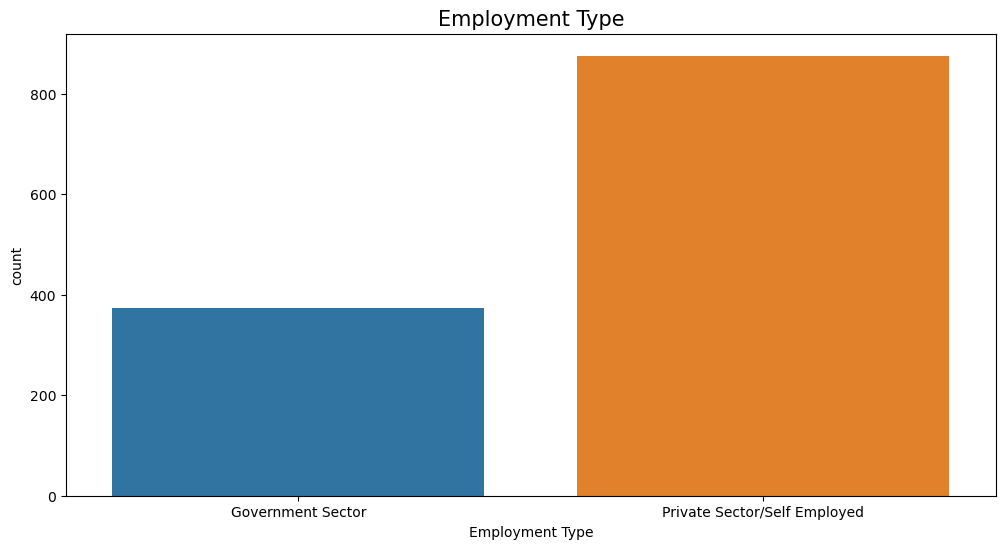

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(newdf["Employment Type"])
plt.title("Employment Type", size=15)
plt.show()

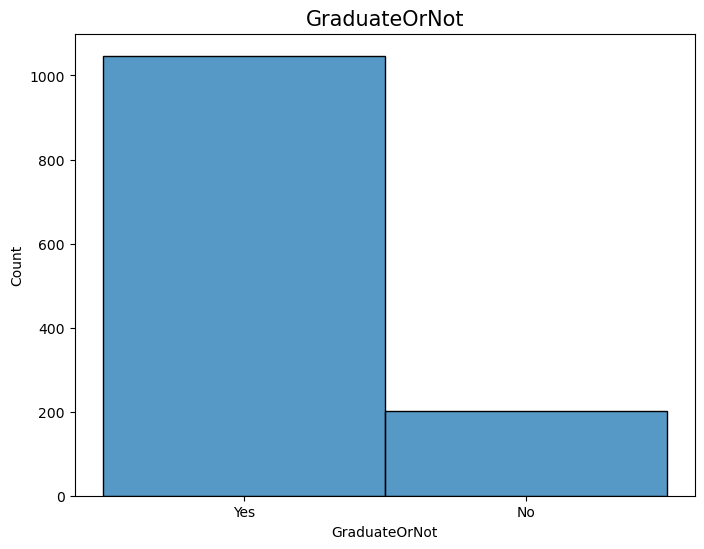

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(newdf["GraduateOrNot"])
plt.title("GraduateOrNot", size=15)
plt.show()

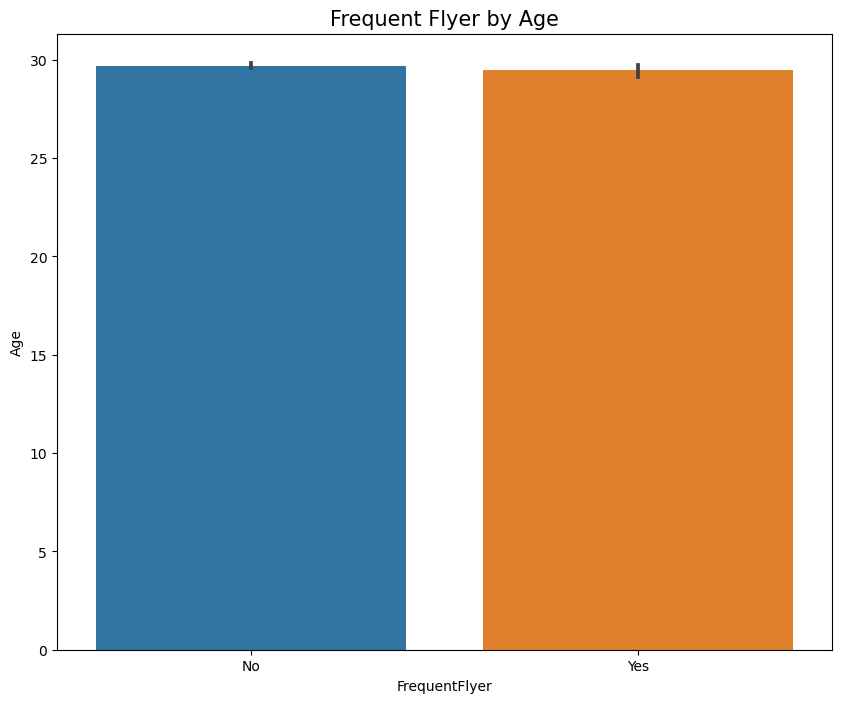

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["FrequentFlyer"], y=df["Age"])
plt.title("Frequent Flyer by Age", size=15)
plt.show()

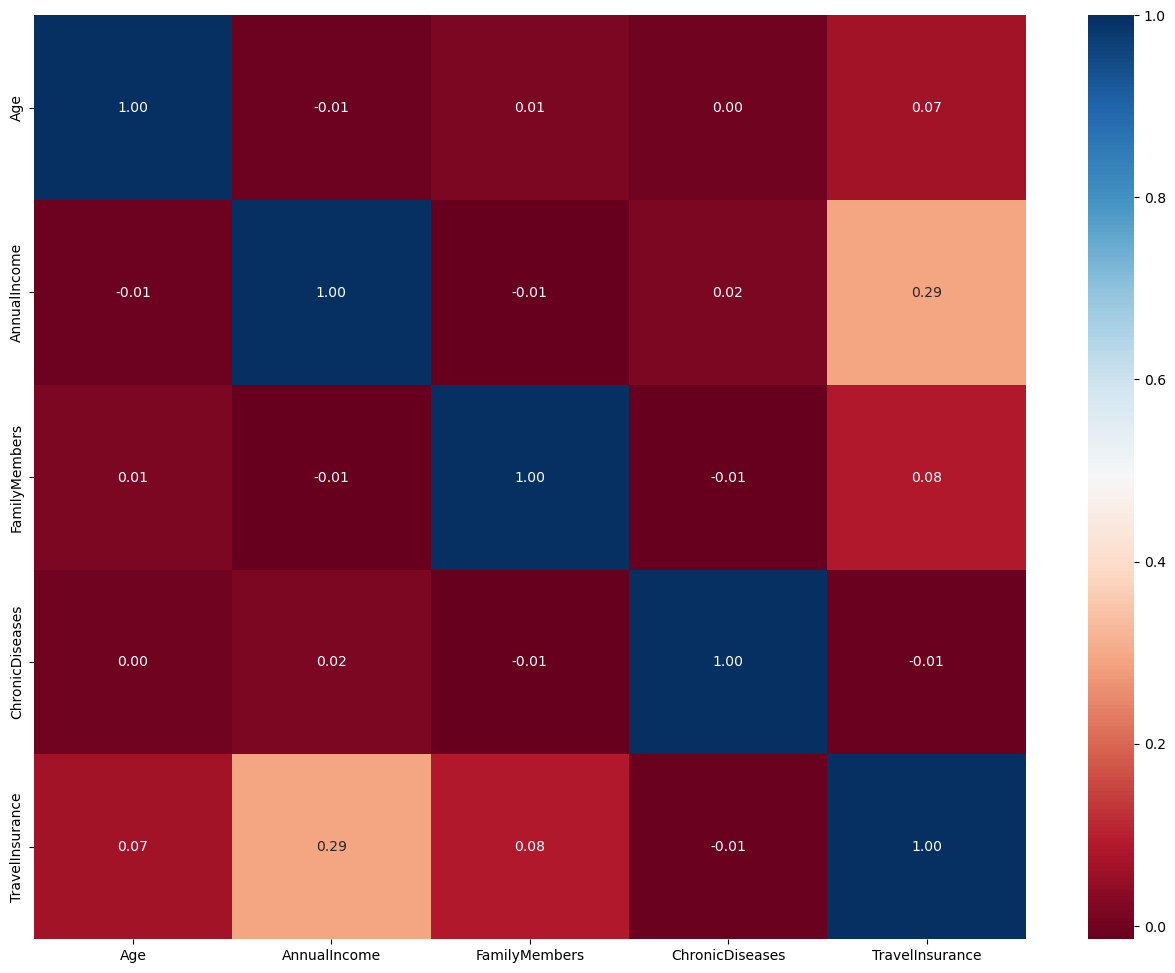

In [18]:
plt.figure(figsize=(16, 12))
sns.heatmap(newdf.corr(), cmap= "RdBu", annot= True, fmt= ".2f")
plt.show()


In [19]:


encoder = LabelEncoder()
columns = ["GraduateOrNot", "FrequentFlyer", "EverTravelledAbroad", "Employment Type"]

for cols in columns:
    newdf[cols] = encoder.fit_transform(newdf[cols])

In [20]:
newdf.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [21]:
newdf.tail()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1976,32,0,1,900000,6,0,0,0,0
1981,27,0,1,850000,3,0,0,0,1
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1985,34,1,1,1000000,6,0,1,1,1


In [22]:
X = newdf.drop("TravelInsurance", axis=1)
y = newdf["TravelInsurance"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size= 0.3)





# KNN 



In [24]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.712

In [25]:
knn_params= {"n_neighbors":np.arange(1,30,1),
            "leaf_size":np.arange(30,50,1)}
knn = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)
knn_cv_model.best_params_

{'leaf_size': 30, 'n_neighbors': 10}

In [26]:
final_knn_model = KNeighborsClassifier(n_neighbors=10, leaf_size=30).fit(X_train, y_train)
y_pred = final_knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.76



# RANDOM FOREST



In [27]:
rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6533333333333333

In [28]:
rf_params = {"max_leaf_nodes":np.arange(1,5,1),
            "n_estimators":np.arange(1,10,1),
            "max_depth":np.arange(1,5,1)}
rf = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10).fit(X_train, y_train)
rf_cv_model.best_params_

{'max_depth': 4, 'max_leaf_nodes': 4, 'n_estimators': 8}

In [29]:
final_rf_model = RandomForestClassifier(max_depth=4, max_leaf_nodes=4, n_estimators=8).fit(X_train,y_train)
y_pred = final_rf_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.744



# DECISION TREE CLASSIFIER



In [30]:
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.616

In [31]:
dtc_params = {"max_leaf_nodes":np.arange(1,5,1),
             "max_depth":np.arange(1,5,1),
             "min_samples_split":np.arange(1,10,1)}
dtc = DecisionTreeClassifier()
dtc_cv_model = GridSearchCV(dtc, dtc_params, cv = 10).fit(X_train, y_train)
dtc_cv_model.best_params_

{'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [32]:
final_dtc_model = DecisionTreeClassifier(max_leaf_nodes = 4, max_depth = 3, min_samples_split = 2).fit(X_train, y_train)
y_pred = final_dtc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7893333333333333